In [1]:
import numpy as np
from numpy.random import RandomState
from numpy.linalg import lstsq
from matplotlib.pyplot import plot

In [2]:
rnd = RandomState(seed=1234)

In [3]:
X = rnd.normal(0, 0.1, size=(100, 10))
S = np.exp(np.cumsum(X, axis=0))

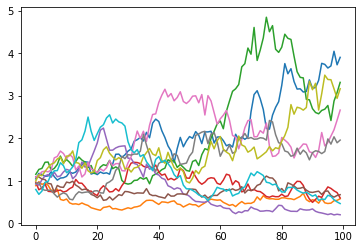

In [4]:
plot(S);

In [5]:
class PolynomialRegressionFunction:
    def __init__(self, exponent):
        self.exponent = exponent
    
    def __str__(self):
        return f'x**{self.exponent}'
    
    def __call__(self, x):
        return x ** self.exponent

In [6]:
class RegressionBasis:
    def __init__(self, regression_functions):
        self.regression_functions = regression_functions
    
    def __str__(self):
        return ' + '.join(str(f) for f in self.regression_functions)
    
    def apply(self, x):
        for f in self.regression_functions:
            yield f(x)
    
    def __call__(self, x):
        assert x.ndim == 1
        x = x.reshape((x.shape[0], 1))
        return np.concatenate(tuple(self.apply(x)), axis=1)

In [7]:
class PolynomialRegressionBasis(RegressionBasis):
    def __init__(self, degree):
        super().__init__([PolynomialRegressionFunction(i) for i in range(degree + 1)])
        self.degree = degree

In [8]:
regr = PolynomialRegressionBasis(3)
str(regr)

'x**0 + x**1 + x**2 + x**3'

In [9]:
regr(S[-1, :])

array([[1.00000000e+00, 3.90082492e+00, 1.52164350e+01, 5.93566489e+01],
       [1.00000000e+00, 5.80573641e-01, 3.37065753e-01, 1.95691492e-01],
       [1.00000000e+00, 3.31318746e+00, 1.09772111e+01, 3.63695583e+01],
       [1.00000000e+00, 6.00853349e-01, 3.61024747e-01, 2.16922928e-01],
       [1.00000000e+00, 2.05217199e-01, 4.21140987e-02, 8.64253737e-03],
       [1.00000000e+00, 6.75870546e-01, 4.56800996e-01, 3.08738339e-01],
       [1.00000000e+00, 2.66202202e+00, 7.08636125e+00, 1.88640497e+01],
       [1.00000000e+00, 1.95838469e+00, 3.83527058e+00, 7.51093516e+00],
       [1.00000000e+00, 3.16373877e+00, 1.00092430e+01, 3.16666302e+01],
       [1.00000000e+00, 4.67938726e-01, 2.18966651e-01, 1.02462976e-01]])